In [11]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#훈련용 데이터
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
#테스트 데이터
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('담백설', '담홍설', '설태_박태', '설태_황태',
           '설태_후태', '정상', '홍설')

Files already downloaded and verified
Files already downloaded and verified


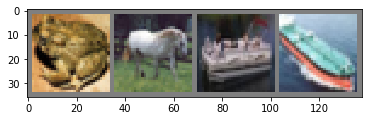

 frog horse  ship  ship


In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):  #두 번 훈련

    running_loss = 0.0 #오차 초기화
    for i, data in enumerate(trainloader, 0): #데이터 가져와 하나씩 분할
        
        inputs, labels = data #왼쪽 그림 , 오른쪽 분류 클래스 확인 (번호)

        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('혀 사진 트레이닝이 끝났습니다.')

[1,  2000] loss: 1.212
[1,  4000] loss: 1.201
[1,  6000] loss: 1.207
[1,  8000] loss: 1.184
[1, 10000] loss: 1.172
[1, 12000] loss: 1.177
[2,  2000] loss: 1.101
[2,  4000] loss: 1.108
[2,  6000] loss: 1.113
[2,  8000] loss: 1.090
[2, 10000] loss: 1.100
[2, 12000] loss: 1.096
혀 사진 트레이닝이 끝났습니다.


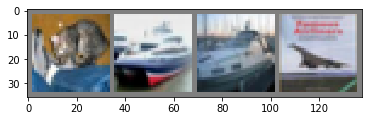

GroundTruth:    cat  ship  ship plane


In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
outputs = net(images)

In [9]:
outputs

tensor([[-1.0186, -1.2979,  1.0996,  2.4286,  0.2457,  1.0468,  0.8796, -0.6739,
         -1.5577, -1.4580],
        [ 5.3238,  3.2007, -0.6458, -1.6726, -1.0852, -3.5927, -4.5317, -3.4325,
          3.6424,  2.9127],
        [ 3.6920,  3.0719,  0.2323, -1.6682, -1.1967, -3.0400, -3.5326, -2.5888,
          2.8452,  2.0150],
        [ 5.4151, -0.6951,  1.6553, -0.9555,  0.3452, -2.4909, -3.2305, -2.5238,
          3.0364, -0.6074]], grad_fn=<AddmmBackward>)

In [10]:
torch.max(outputs,1)

torch.return_types.max(
values=tensor([2.4286, 5.3238, 3.6920, 5.4151], grad_fn=<MaxBackward0>),
indices=tensor([3, 0, 0, 0]))

In [17]:
correct = 0 #맞은 것 (정확도)
total = 0 #시험본 것
with torch.no_grad(): #그래디언트 적용 안함
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('테스트 혀 사진의 정확도: %d %%' % (
    100 * correct / total))

테스트 혀 사진의 정확도: 60 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(7):
    print('[%5s] 추측 정확도 : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

[  담백설] 추측 정확도 : 74 %
[  담홍설] 추측 정확도 : 71 %
[설태_박태] 추측 정확도 : 37 %
[설태_황태] 추측 정확도 : 39 %
[설태_후태] 추측 정확도 : 44 %
[   정상] 추측 정확도 : 49 %
[   홍설] 추측 정확도 : 73 %
